In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.shape

(48895, 16)

In [4]:
# missing values 
print(round((100*df.isnull().mean()).sort_values(ascending=False),2))

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64


In [5]:
# imputing missing value with median
df1=df.fillna(df.median())

In [6]:
# imputing missing value with mode
mod=df1["last_review"].mode()[0]
df1["last_review"]=df1["last_review"].fillna(mod)

In [7]:
round(100*df1.isnull().mean().sort_values(ascending=False),2)

host_name                         0.04
name                              0.03
id                                0.00
host_id                           0.00
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.00
reviews_per_month                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [8]:
# loading clean data to csv
df1.to_csv("AIR_BNB_CLEAN.csv",index=False)

In [9]:
# checking statistics for all the columns
df1.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.238930   
std         20.510550          44.550582           1.520861   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.280000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [10]:
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# segmenting the columns
cat=['room_type','neighbourhood_group','neighbourhood']
cnt=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']

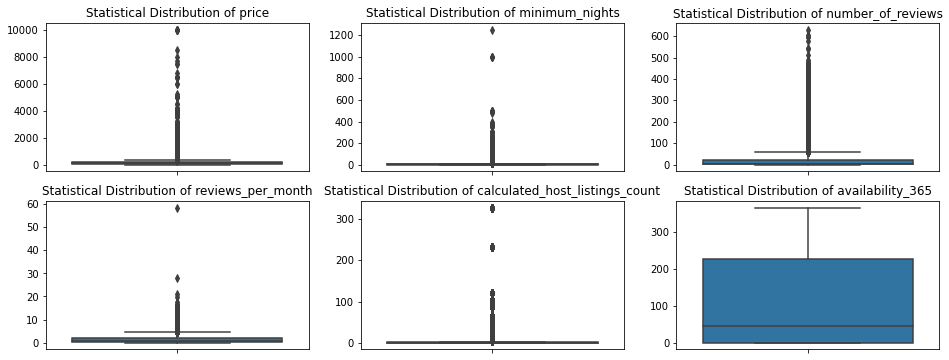

In [12]:
# box plot for checking outliers
plt.figure(figsize=(16,6))
for i in enumerate(cnt):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title("Statistical Distribution of "+i[1])
    plt.ylabel("")

In [13]:
# treating outliers with capping method
for i in cnt:
    q1=df1[i].describe()["25%"]
    q3=df1[i].describe()["75%"]
    iqr=q3-q1
    ub=q3+1.5*iqr
    df1[i]=np.where(df1[i]>ub,ub,df1[i])

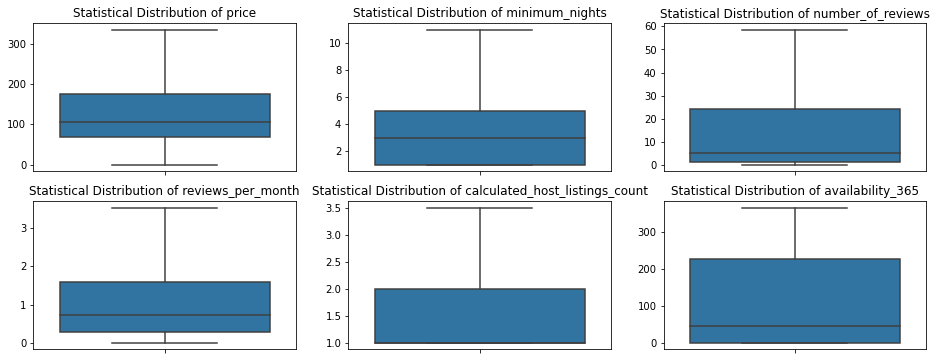

In [14]:
# box plot for checking outliers after treatment
plt.figure(figsize=(16,6))
for i in enumerate(cnt):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(y=df1[i[1]])
    plt.title("Statistical Distribution of "+i[1])
    plt.ylabel("")

In [15]:
# loading clean and balanced data to csv
df1.to_csv("AIR_BNB.csv",index=False)

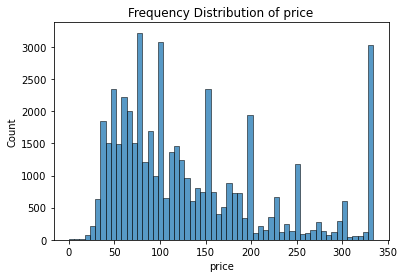

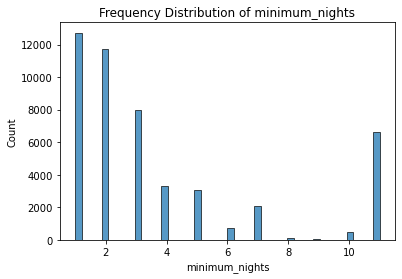

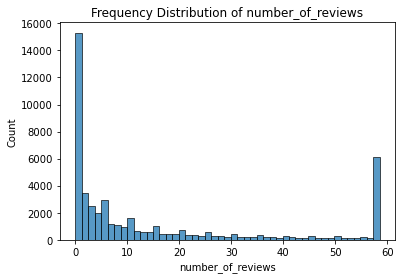

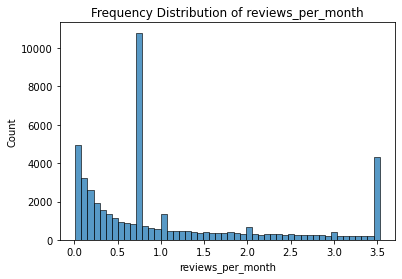

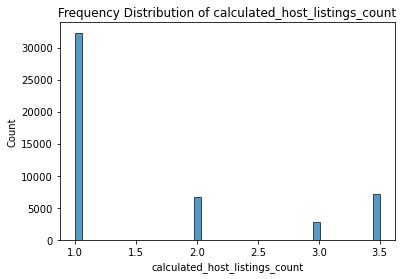

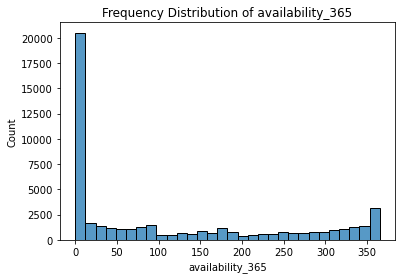

In [16]:
# Univariate Analysis : Histogram
for i in cnt:
    sns.histplot(x=df1[i])
    plt.title("Frequency Distribution of "+i)
    plt.show()

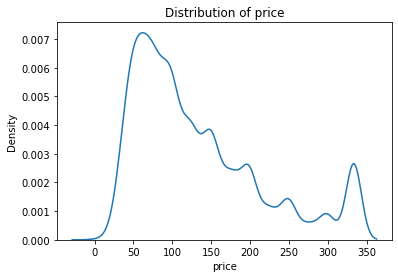

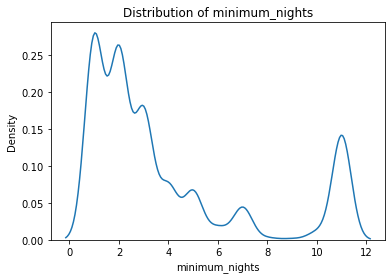

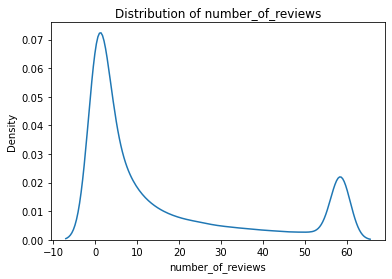

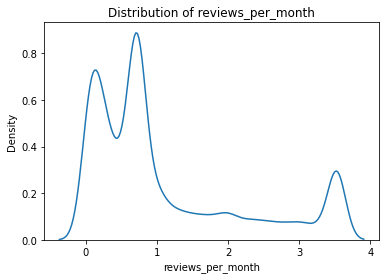

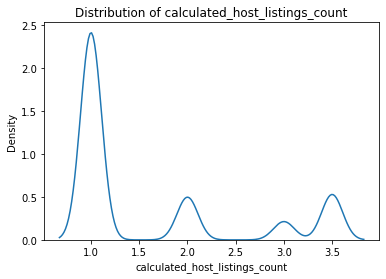

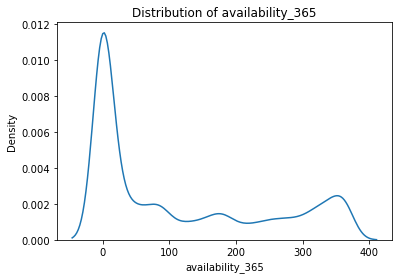

In [17]:
# Univariate Analysis : Distribution plot
for i in cnt:
    sns.distplot(df1[i],hist=False)
    plt.title("Distribution of "+i)
    plt.show()

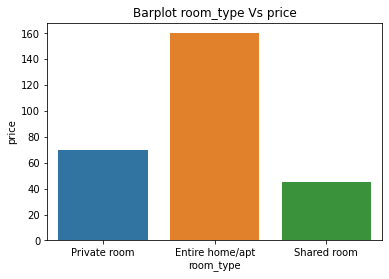

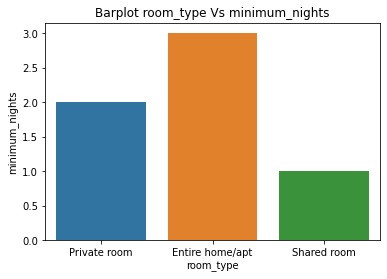

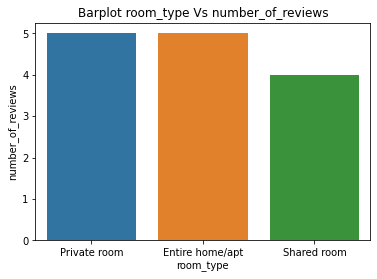

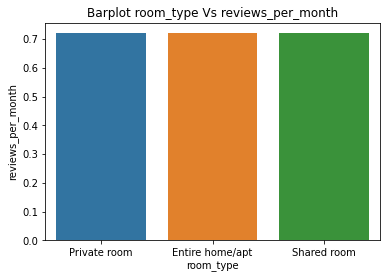

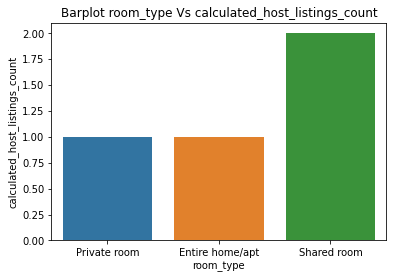

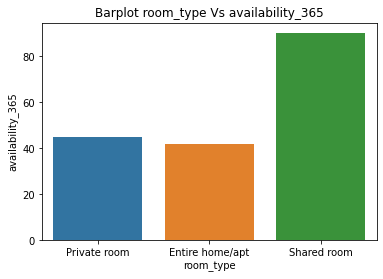

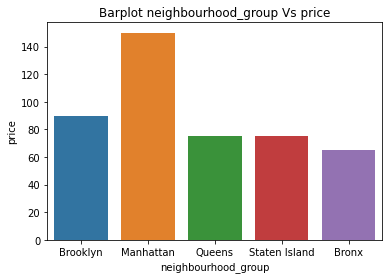

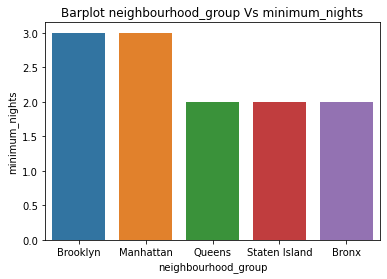

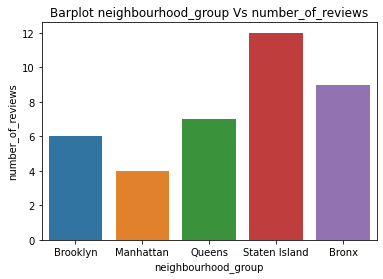

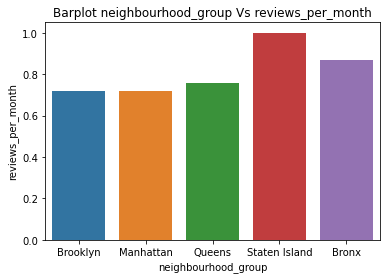

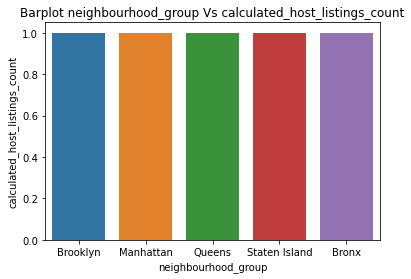

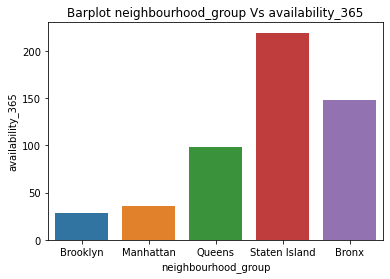

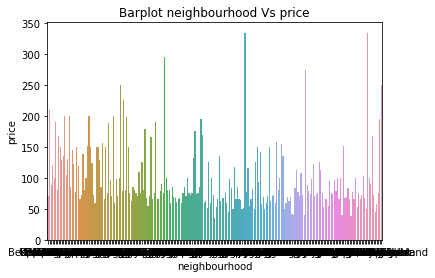

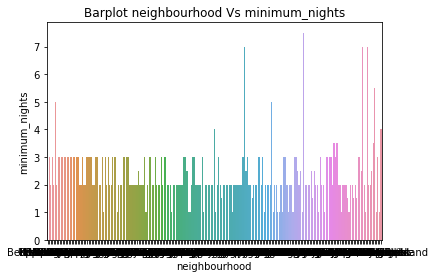

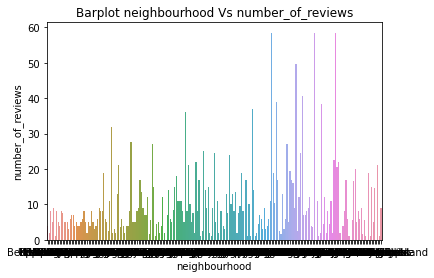

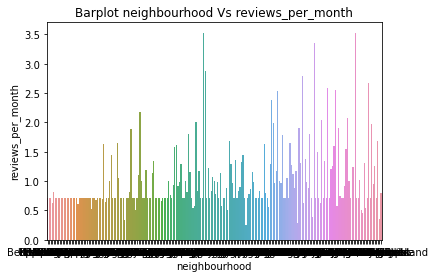

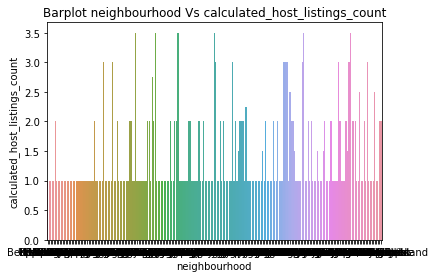

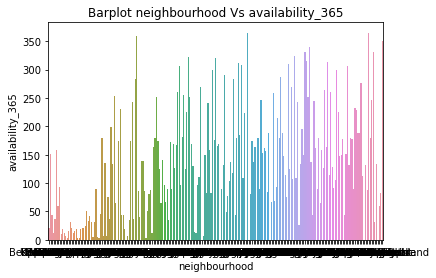

In [18]:
# Bivariate Analysis : Bar Plot
for i in cat:
    for j in cnt:
        sns.barplot(df1[i],df1[j],ci=None,estimator=np.median)
        plt.title("Barplot "+i+" Vs "+j)
        plt.show()

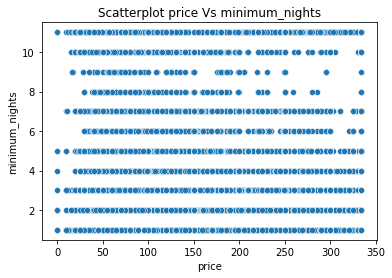

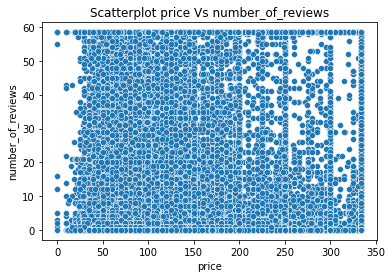

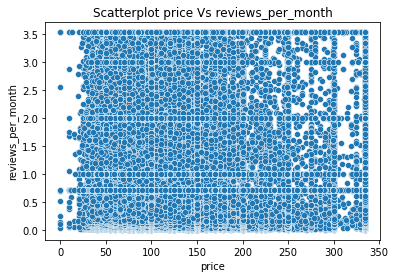

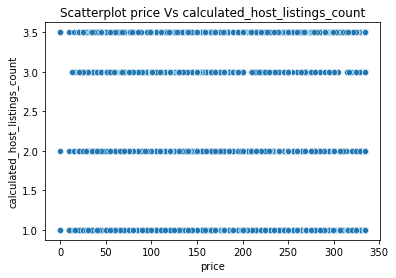

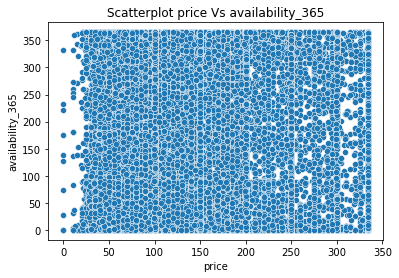

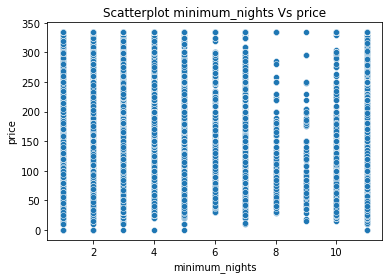

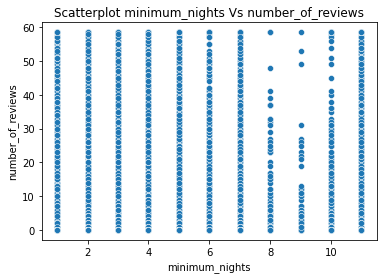

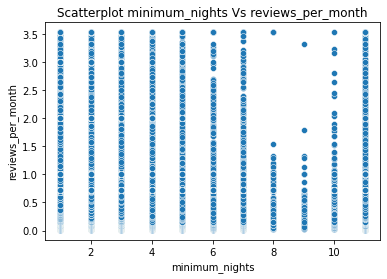

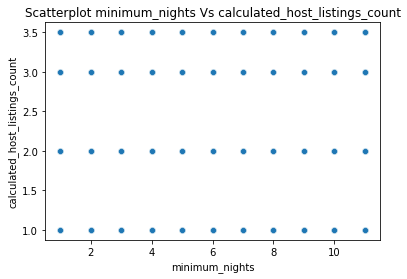

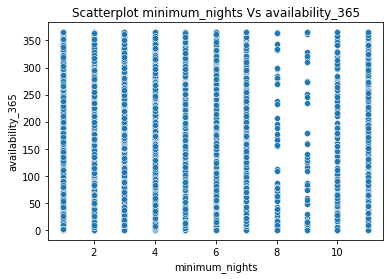

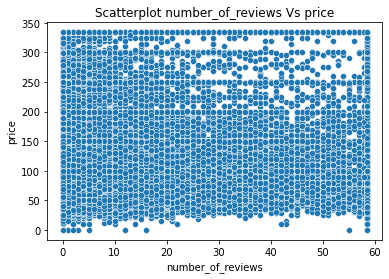

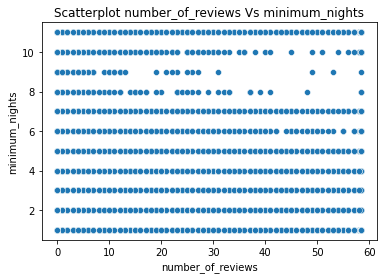

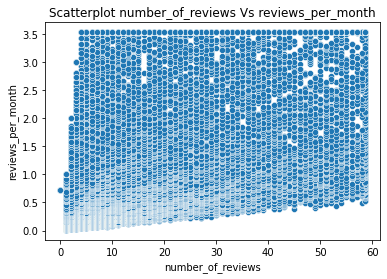

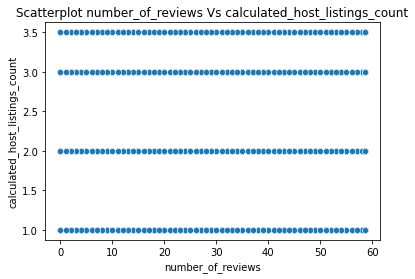

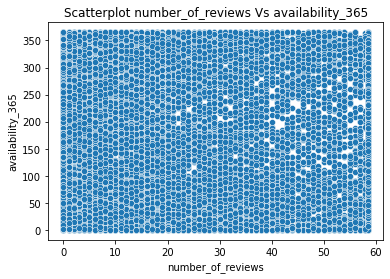

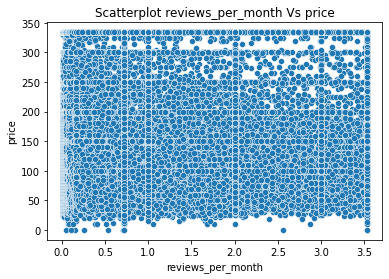

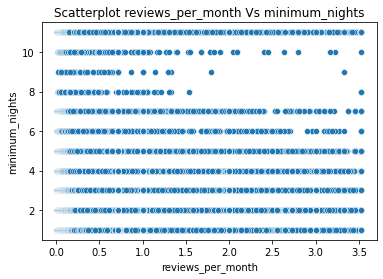

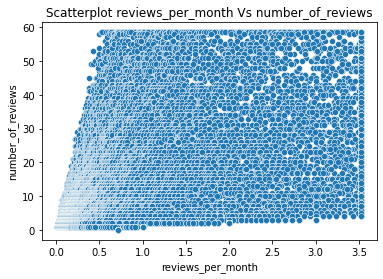

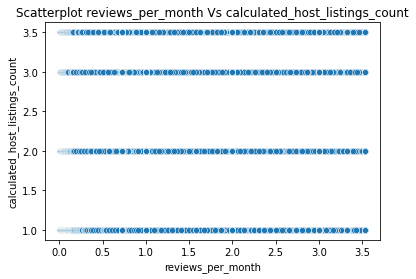

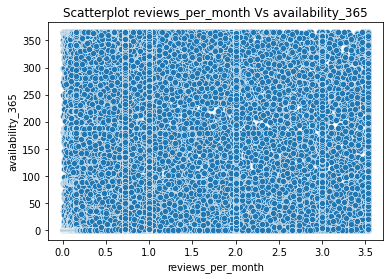

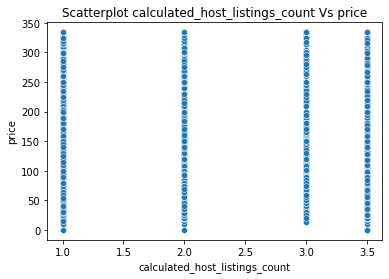

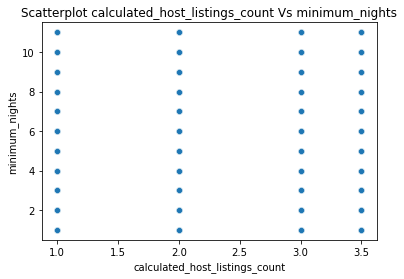

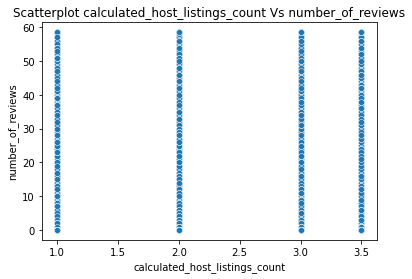

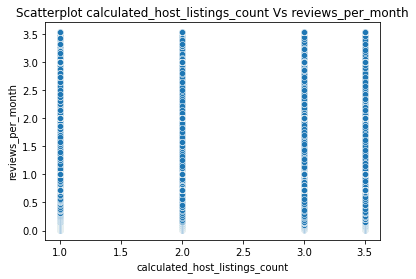

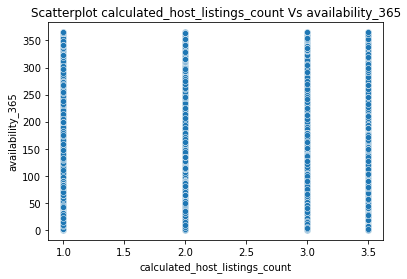

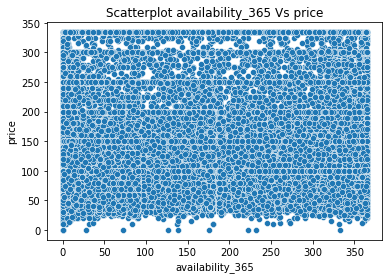

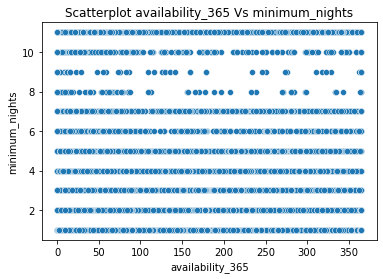

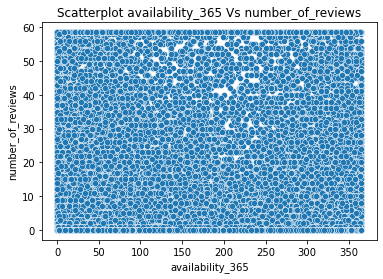

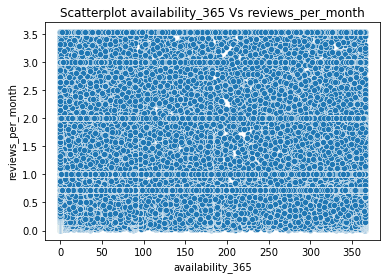

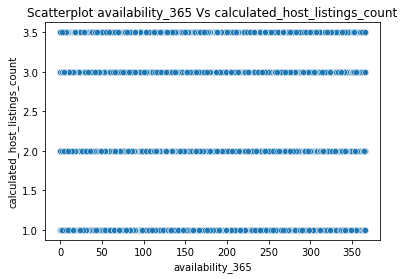

In [19]:
# Bivariate Analysis : Scatter Plot
for i in cnt:
    for j in cnt:
        if i!=j:
            sns.scatterplot(df1[i],df1[j])
            plt.title("Scatterplot "+i+" Vs "+j)
            plt.show() 

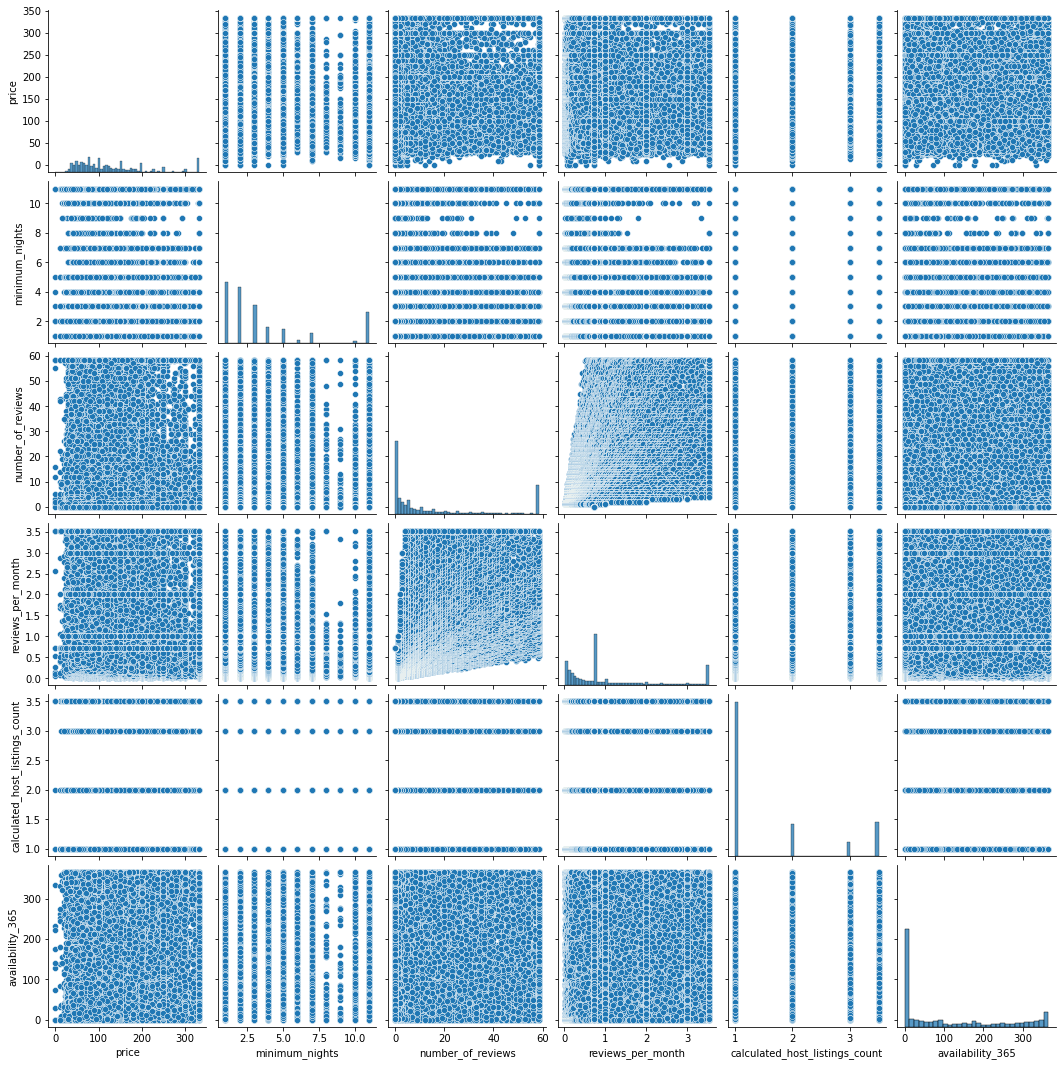

In [20]:
# Multivariate Analysis : Pair Plot
sns.pairplot(df1[cnt])
plt.show()

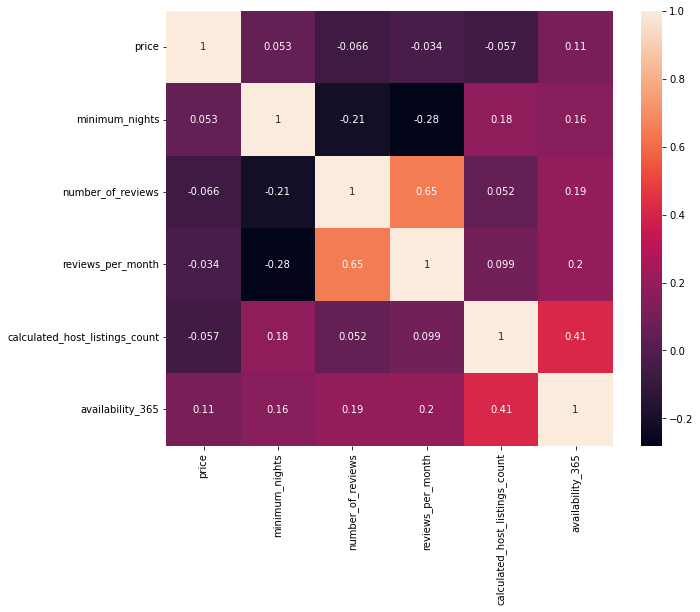

In [21]:
# Multivariate Analysis : Heat Map
plt.figure(figsize=(10,8))
sns.heatmap(df1[cnt].corr(),annot=True)
plt.show()

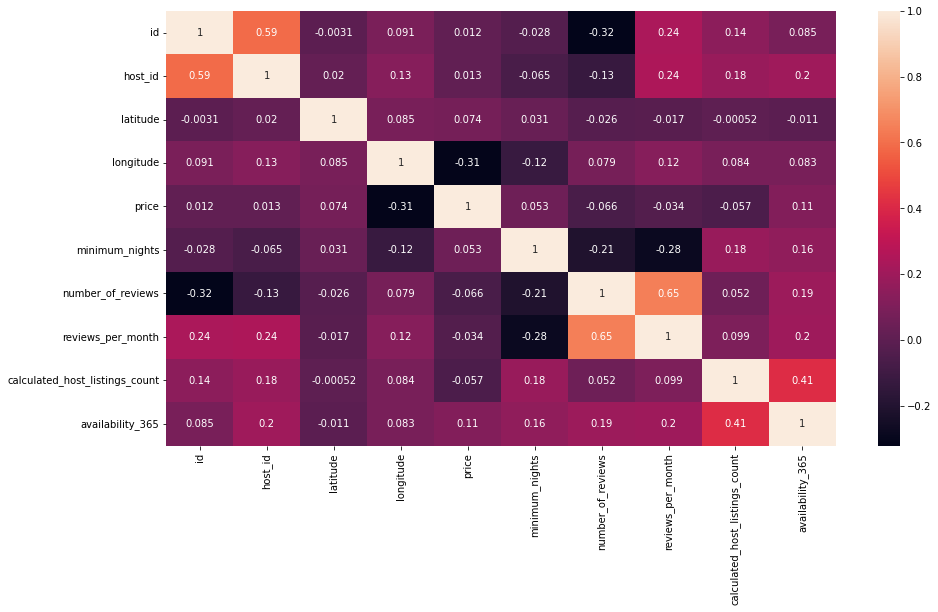

In [22]:
corr = df1.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

In [23]:
df1['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

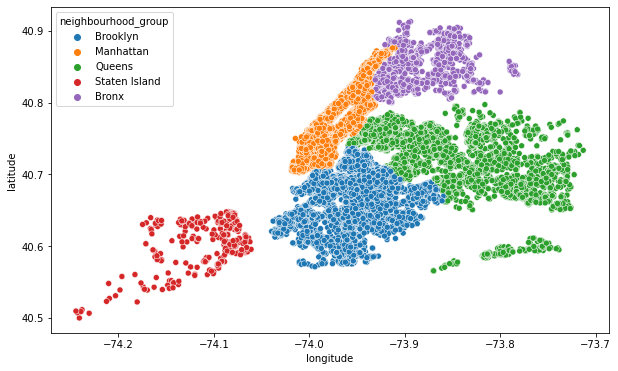

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.neighbourhood_group)
plt.show()

In [25]:
df1['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

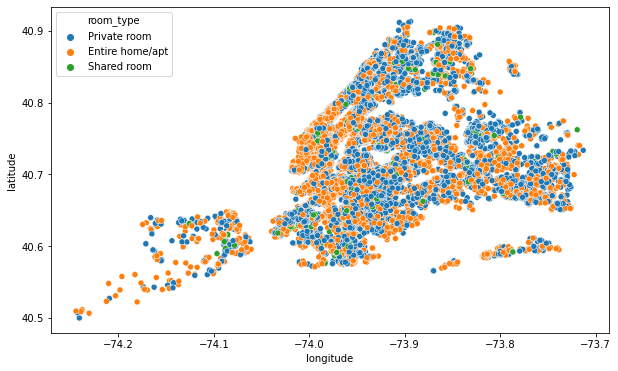

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.room_type)
plt.show()

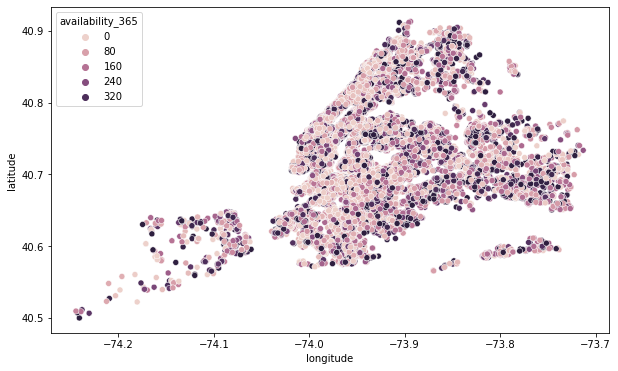

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.availability_365)
plt.show()

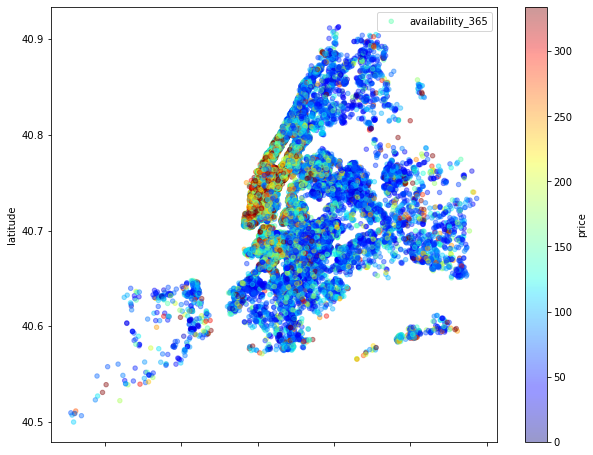

In [28]:
#Using our given longtitude and latitude columns
df1.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.show()

In [29]:
# There is no sense to count correlation with ID. 
# This is only ordinary number, not variable.
columns = ['id','host_id']
new_data = df1.drop(axis=1,labels=columns)
new_data.corr().style.background_gradient(cmap="coolwarm")

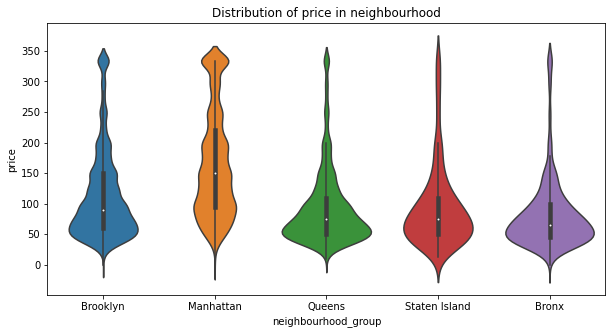

In [30]:
# violinplot to see the price distribution
plt.figure(figsize=(10,5))
tt=sns.violinplot(data=df1, x='neighbourhood_group', y='price')
tt.set_title('Distribution of price in neighbourhood')
plt.show()

In [31]:
df1[cnt].corr().style.background_gradient(cmap='coolwarm')
# plt.show()